## BAX 452 001-002 WQ 2024 Machine Learning
## Assignment 2
## Richard Liu

In [113]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import Lasso
from sklearn.linear_model import LassoCV
from sklearn.model_selection import cross_val_score

directory_path = '/Users/richardaliu/Downloads/Winter/BAX 452/HW 4'
os.chdir(directory_path)
current_directory = os.getcwd()
print("Current working directory:", current_directory)


Current working directory: /Users/richardaliu/Downloads/Winter/BAX 452/HW 4


1. Exploratory Data Analysis (EDA) (20 pts):
Conduct a thorough exploration of the provided datasets. This includes understanding the
structure, identifying missing values, and summarizing key statistics.
Generate visualizations to understand the distribution of important variables, relationships
between different variables, and any other patterns or anomalies in the data such as peculiar
patterns or outliers.

In [114]:
script_small = 'longyear-obese-hypertensive-40-75-scripts-SMALL-sample.csv'
medical_small = 'longyear-obese-hypertensive-40-57-medical-SMALL-sample.csv'

script_df = pd.read_csv(script_small)
medical_df = pd.read_csv(medical_small)



/var/folders/1p/ylkl09gx1c99ckq9bwmmkv800000gn/T/ipykernel_56929/4215911222.py:4: DtypeWarning: Columns (9,10,29,43) have mixed types. Specify dtype option on import or set low_memory=False.
  script_df = pd.read_csv(script_small)


In [115]:
script_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 894623 entries, 0 to 894622
Data columns (total 48 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   journey_id                     894623 non-null  object 
 1   cohort_id                      894623 non-null  int64  
 2   claim_id                       894623 non-null  object 
 3   patient_gender                 894623 non-null  object 
 4   patient_state                  894623 non-null  object 
 5   patient_zip                    894501 non-null  float64
 6   patient_dob                    894619 non-null  object 
 7   pharmacy_npi                   839958 non-null  float64
 8   pharmacist_npi                 21578 non-null   float64
 9   prescriber_npi                 891155 non-null  object 
 10  primary_care_npi               3569 non-null    object 
 11  group_id                       273621 non-null  object 
 12  date_of_service               

In [116]:
print('Shape of dataframe\n',f'Rows: {script_df.shape[0]}\t',f'Columns: {script_df.shape[1]}')



Shape of dataframe
 Rows: 894623	 Columns: 48


In [117]:
script_df.head()
script_df.tail()

,journey_id,cohort_id,claim_id,patient_gender,patient_state,patient_zip,patient_dob,pharmacy_npi,pharmacist_npi,prescriber_npi,...,bin,plan_pay,reject_code_1,reject_code_3,reject_code_4,reject_code_5,ndc,active,start_date,end_date
894618,1fff19f39322d5c25a60259f30d937a4,16,00b40574911dfaacbd19f8db7641673031b4738cc71838...,M,CA,922.0,1965-01-01,1.497325e+09,NaN,1982176947,...,22659.0,555.84,NaN,NaN,NaN,NaN,310621030,True,190001,NaN
894619,1fff19f39322d5c25a60259f30d937a4,16,e75d345e22e26ceed179784cca7cec1fbc942c45fed1e0...,M,CA,922.0,1965-01-01,1.497325e+09,NaN,1982176947,...,22659.0,555.84,NaN,NaN,NaN,NaN,310621030,True,190001,NaN
894620,1fff19f39322d5c25a60259f30d937a4,16,861149b8edac30aa231d2c3c26bdb8a8e018f0959e79f0...,M,CA,922.0,1965-01-01,1.497325e+09,NaN,1982176947,...,22659.0,555.84,NaN,NaN,NaN,NaN,310621030,True,190001,NaN
894621,1fff19f39322d5c25a60259f30d937a4,16,fda3169542011ad3251f1afcd49626bdc4608f29c05ef5...,M,CA,922.0,1965-01-01,1.497325e+09,NaN,1982176947,...,22659.0,15.72,NaN,NaN,NaN,NaN,65862020299,True,190001,NaN
894622,1fff19f39322d5c25a60259f30d937a4,16,e791b4b64e3043691777f9f9dc6006684d6c3c43f49dbf...,M,CA,922.0,1965-01-01,1.497325e+09,NaN,1982176947,...,22659.0,15.72,NaN,NaN,NaN,NaN,65862020299,True,190001,NaN


In [118]:
print(script_df.columns)


Index(['journey_id', 'cohort_id', 'claim_id', 'patient_gender',
       'patient_state', 'patient_zip', 'patient_dob', 'pharmacy_npi',
       'pharmacist_npi', 'prescriber_npi', 'primary_care_npi', 'group_id',
       'date_of_service', 'date_authorized', 'transaction_type',
       'date_prescription_written', 'ndc11', 'ndc11_original',
       'number_of_refills_authorized', 'diagnosis_code', 'diagnosis_code_type',
       'quantity_prescribed_original', 'quantity_dispensed',
       'place_of_service', 'is_service', 'level_of_service', 'fill_number',
       'days_supply', 'unit_of_measure', 'daw_code',
       'prior_authorization_type_code', 'is_compound_drug', 'coupon_type',
       'coupon_value_amount', 'pharmacy_submitted_cost', 'patient_pay',
       'copay_coinsurance', 'pcn', 'bin', 'plan_pay', 'reject_code_1',
       'reject_code_3', 'reject_code_4', 'reject_code_5', 'ndc', 'active',
       'start_date', 'end_date'],
      dtype='object')


In [119]:
script_df.describe()

,cohort_id,patient_zip,pharmacy_npi,pharmacist_npi,ndc11,ndc11_original,number_of_refills_authorized,diagnosis_code_type,quantity_prescribed_original,quantity_dispensed,...,coupon_type,coupon_value_amount,pharmacy_submitted_cost,patient_pay,copay_coinsurance,bin,plan_pay,ndc,start_date,end_date
count,894623.000000,894501.000000,8.399580e+05,2.157800e+04,8.946230e+05,9.420300e+04,849519.000000,111634.000000,322348.00000,8.946160e+05,...,2030.0,5.0,7.850810e+05,601820.000000,411383.000000,786240.000000,491878.000000,8.946230e+05,894623.000000,32448.000000
mean,16.065902,886.761085,1.505555e+09,1.475807e+09,3.913810e+10,1.318060e+10,2.496945,9.999113,11.03221,7.151479e+01,...,88.0,99.0,4.547052e+02,10.890529,7.075289,121957.811418,167.327912,3.913810e+10,190740.803998,201718.841285
std,0.248110,121.719342,2.862710e+08,2.925536e+08,2.808575e+10,2.446082e+10,6.861014,0.029767,85.75864,3.589294e+03,...,0.0,0.0,4.805967e+04,96.639674,59.716082,230816.951281,802.330352,2.808575e+10,2830.185124,400.902819
min,16.000000,100.000000,1.003010e+09,1.003455e+09,2.143301e+06,0.000000e+00,-1.000000,9.000000,0.00000,0.000000e+00,...,88.0,99.0,-7.370000e+00,-189.700000,-3198.400000,0.000000,-1458.620000,2.143301e+06,190001.000000,201001.000000
25%,16.000000,900.000000,1.255441e+09,1.154909e+09,9.046999e+08,0.000000e+00,0.000000,10.000000,0.00000,3.000000e+01,...,88.0,99.0,2.799000e+01,0.000000,0.000000,4336.000000,2.290000,9.046999e+08,190001.000000,201411.000000
50%,16.000000,913.000000,1.497865e+09,1.457999e+09,4.948305e+10,0.000000e+00,1.000000,10.000000,0.00000,3.000000e+01,...,88.0,99.0,9.526000e+01,0.000000,1.350000,17010.000000,13.580000,4.948305e+10,190001.000000,201802.000000
75%,16.000000,922.000000,1.740323e+09,1.689011e+09,6.586206e+10,9.551004e+08,3.000000,10.000000,0.00000,9.000000e+01,...,88.0,99.0,3.220600e+02,4.000000,4.150000,22659.000000,36.300000,6.586206e+10,190001.000000,201907.000000
max,17.000000,992.000000,6.167056e+09,1.992978e+09,9.920701e+10,9.920705e+10,99.000000,10.000000,10000.00000,3.390291e+06,...,88.0,99.0,4.252220e+07,25598.020000,6923.160000,900020.000000,50307.120000,9.920701e+10,202308.000000,202307.000000


In [120]:
medical_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 623525 entries, 0 to 623524
Data columns (total 34 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   journey_id         623525 non-null  object 
 1   episode_id         623525 non-null  object 
 2   visit_id           621650 non-null  object 
 3   encounter_id       623525 non-null  object 
 4   claim_date         623525 non-null  object 
 5   patient_state      623525 non-null  object 
 6   patient_short_zip  623512 non-null  float64
 7   patient_age        616980 non-null  float64
 8   patient_gender     623393 non-null  object 
 9   place_of_service   484555 non-null  object 
 10  visit_type         600454 non-null  object 
 11  payor              608936 non-null  object 
 12  payor_channel      586086 non-null  object 
 13  ref_npi            297501 non-null  float64
 14  hcp_npi            434653 non-null  float64
 15  hcp_taxonomy       428209 non-null  object 
 16  hc

In [121]:
print('Shape of dataframe\n',f'Rows: {medical_df.shape[0]}\t',f'Columns: {medical_df.shape[1]}')


Shape of dataframe
 Rows: 623525	 Columns: 34


In [122]:
medical_df.head()
medical_df.tail()

,journey_id,episode_id,visit_id,encounter_id,claim_date,patient_state,patient_short_zip,patient_age,patient_gender,place_of_service,...,diag_4,diag_5,rev_center_code,rev_center_units,proc_code,proc_modifier,proc_units,line_charge,claim_charge,smart_allowed
623520,1fffbb8b7e6a6c38cf97dafe3c5bc1cc,68f555e03ccddc02c78db02eab162c73,c45c2ba5fa8c97f5dd9e39064496898a54e7c82624ac9e...,c571d6153d7948e36a32fdc69dd974676473d9496772a6...,2023-01-04,CA,922.0,50.0,M,Office,...,K449,NaN,NaN,1.0,99213,NaN,1.0,175.0,175.0,83.22
623521,1fffbb8b7e6a6c38cf97dafe3c5bc1cc,901768130f3fc48d286006e179eab339,a6cd72b2886f6ca2214157a2771350882833506a015485...,580d82dacaf2959c6577a83d5dd9330710f3205e11a571...,2019-05-21,CA,922.0,45.0,M,Office,...,NaN,NaN,NaN,1.0,1159F,NaN,1.0,0.0,0.0,44.68
623522,1fffbb8b7e6a6c38cf97dafe3c5bc1cc,901768130f3fc48d286006e179eab339,a6cd72b2886f6ca2214157a2771350882833506a015485...,580d82dacaf2959c6577a83d5dd9330710f3205e11a571...,2019-05-21,CA,922.0,45.0,M,Office,...,NaN,NaN,NaN,1.0,3080F,NaN,1.0,0.0,0.0,41.93
623523,1fffbb8b7e6a6c38cf97dafe3c5bc1cc,901768130f3fc48d286006e179eab339,a6cd72b2886f6ca2214157a2771350882833506a015485...,580d82dacaf2959c6577a83d5dd9330710f3205e11a571...,2019-05-21,CA,922.0,45.0,M,Office,...,NaN,NaN,NaN,1.0,3077F,NaN,1.0,0.0,0.0,45.01
623524,1fffcb3288827e67d70ac1f368f050f8,46c1dbff0c6e04a998ff57432bbac50d,b9f23c864b1b11ca1e16706536d7ec6d316a13280a5dc3...,26148dc75235d3141c15d30cab6ff0e32381f912dc010d...,2022-05-25,CA,921.0,65.0,M,Federally Qualified Health Center,...,R7989,H547,NaN,1.0,99214,NaN,1.0,263.0,263.0,139.64


In [123]:
print(medical_df.columns)

Index(['journey_id', 'episode_id', 'visit_id', 'encounter_id', 'claim_date',
       'patient_state', 'patient_short_zip', 'patient_age', 'patient_gender',
       'place_of_service', 'visit_type', 'payor', 'payor_channel', 'ref_npi',
       'hcp_npi', 'hcp_taxonomy', 'hcp_specialty', 'hco_npi', 'hcp_npi_list',
       'hco_npi_list', 'diag_list', 'diag_1', 'diag_2', 'diag_3', 'diag_4',
       'diag_5', 'rev_center_code', 'rev_center_units', 'proc_code',
       'proc_modifier', 'proc_units', 'line_charge', 'claim_charge',
       'smart_allowed'],
      dtype='object')


In [124]:
medical_df.describe()

,patient_short_zip,patient_age,ref_npi,hcp_npi,hco_npi,rev_center_code,rev_center_units,proc_units,line_charge,claim_charge,smart_allowed
count,623512.000000,616980.000000,2.975010e+05,4.346530e+05,6.177890e+05,113926.000000,621558.000000,621331.000000,623525.000000,623525.000000,623525.000000
mean,907.514954,59.416910,1.502083e+09,1.508734e+09,1.485095e+09,456.083449,1.243236,4.319060,482.437268,482.437268,190.295642
std,40.034735,9.946158,2.868359e+08,2.825083e+08,2.859965e+08,451.591644,2.458118,55.208116,3582.592825,3582.592825,509.339625
min,74.000000,30.000000,1.003001e+09,1.003001e+09,1.003006e+09,1.000000,-14.000000,0.000000,0.000000,0.000000,0.000000
25%,900.000000,55.000000,1.255437e+09,1.265668e+09,1.245340e+09,301.000000,1.000000,1.000000,10.000000,10.000000,18.190000
50%,911.000000,60.000000,1.508952e+09,1.528016e+09,1.467631e+09,320.000000,1.000000,1.000000,70.000000,70.000000,75.230000
75%,922.000000,65.000000,1.740350e+09,1.740376e+09,1.720295e+09,521.000000,1.000000,1.000000,200.000000,200.000000,182.360000
max,999.000000,80.000000,1.992999e+09,1.993000e+09,1.992995e+09,3103.000000,730.000000,12473.000000,778750.000000,778750.000000,45035.960000


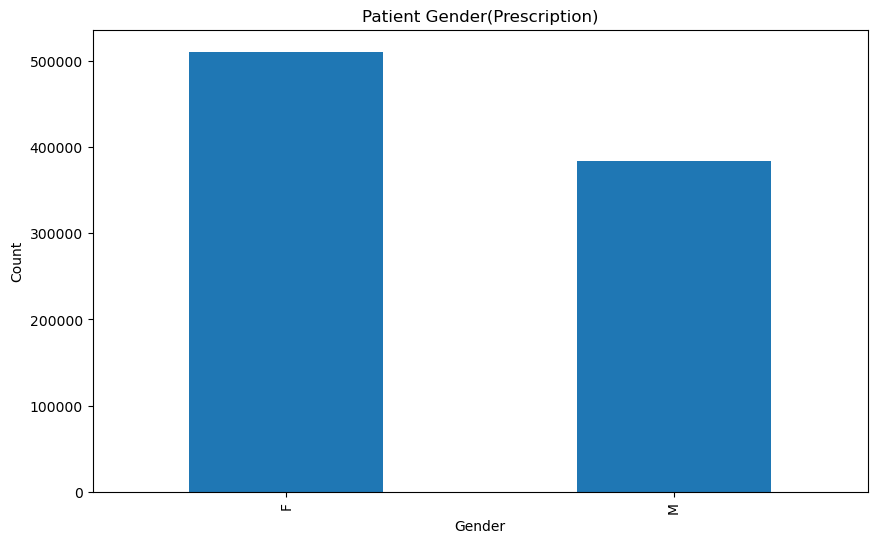

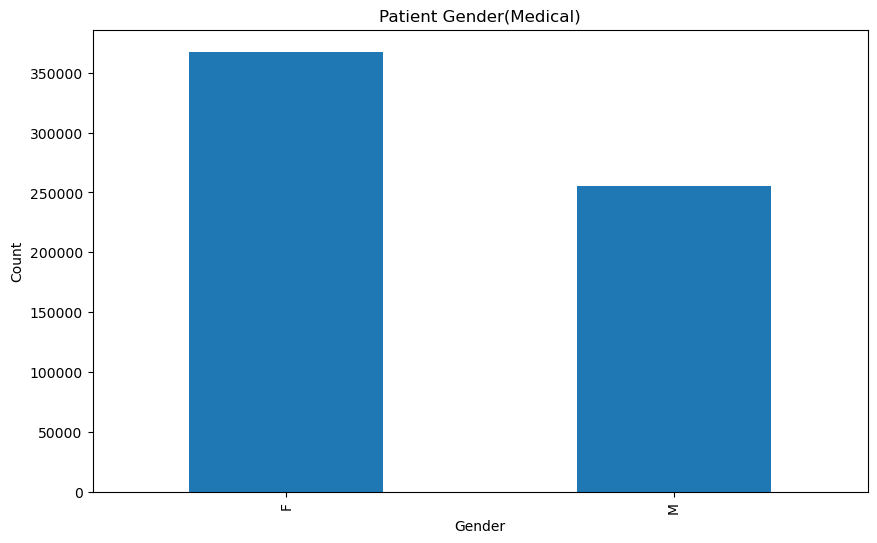

In [125]:
# Bar Chart for Gender in Both Data
script_df['patient_gender'].value_counts().sort_index().plot(kind='bar', figsize=(10, 6))
plt.title('Patient Gender(Prescription)')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

medical_df['patient_gender'].value_counts().sort_index().plot(kind='bar', figsize=(10, 6))
plt.title('Patient Gender(Medical)')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

Comment: This bar chart shows the gender count difference in both of the dataset. This indicates that there are more female patients. 

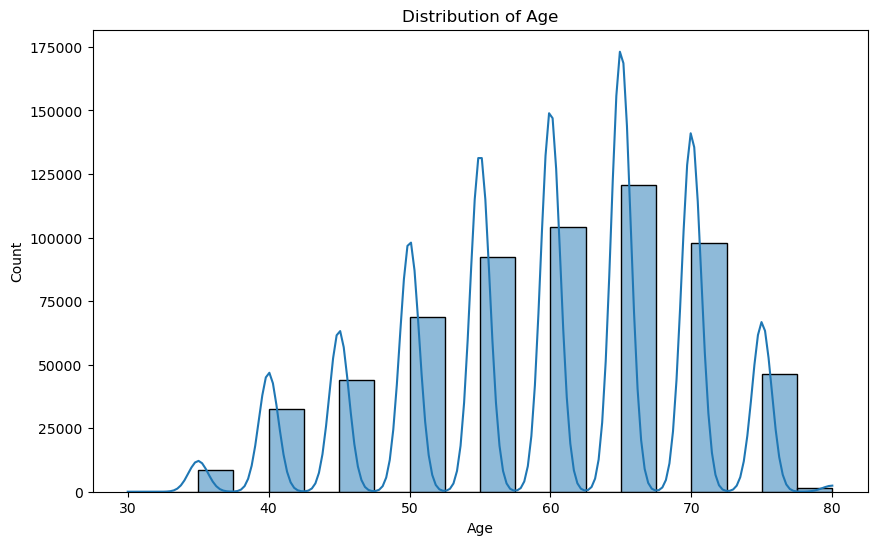

In [126]:
#Histogram for Patient Age in Medical Claims
plt.figure(figsize=(10, 6))
sns.histplot(medical_df['patient_age'], bins=20, kde=True)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()


This graph shows the distribution of age in medical claims dataset. This indicates that most patients are in between 50~70. 

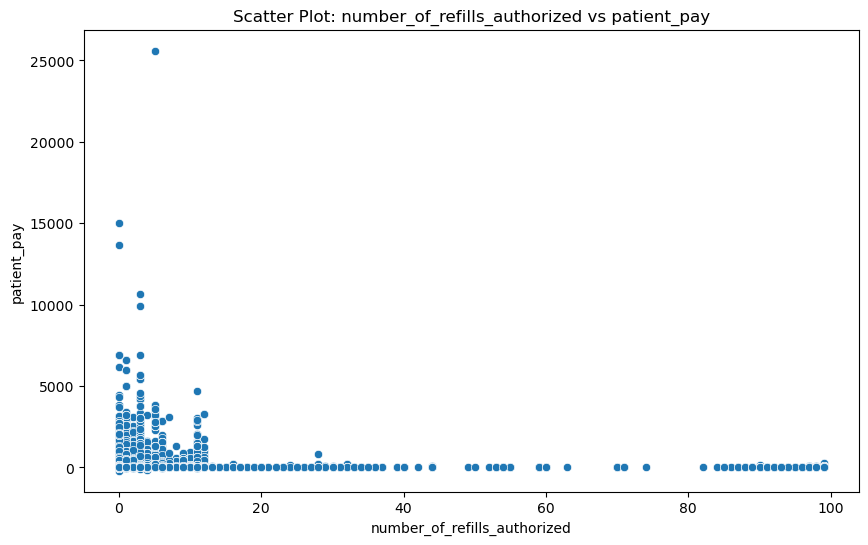

In [127]:
#Scatter plot for Number of Prescription Refill vs Patient Pay for prescription
plt.figure(figsize=(10, 6))
sns.scatterplot(x='number_of_refills_authorized', y='patient_pay', data=script_df)
plt.title('Scatter Plot: number_of_refills_authorized vs patient_pay')
plt.xlabel('number_of_refills_authorized')
plt.ylabel('patient_pay')
plt.show()

The graph shows the number of refill vs the money that patient paid. This indicates that patients do not normally pay more even if the number of refills are high. 

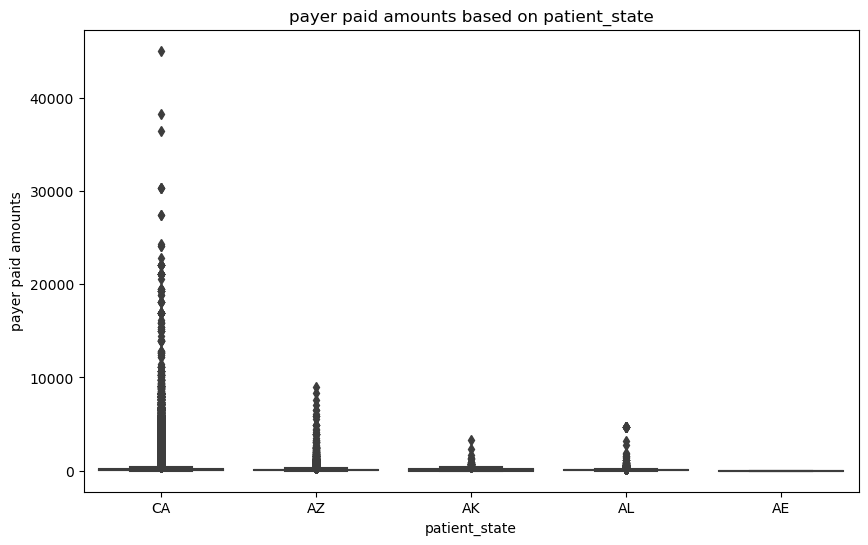

In [128]:
#Boxplot for payer paid amounts for medical claims
plt.figure(figsize=(10, 6))
sns.boxplot(x='patient_state', y='smart_allowed', data=medical_df)
plt.title('payer paid amounts based on patient_state')
plt.xlabel('patient_state')
plt.ylabel('payer paid amounts')
plt.show()

The graph shows the amount that patient paid in each state. It indicates that patients in California tend to pay a higher price. 

##2.Data Preprocessing and Merging (15 pts):
Prepare the datasets for analysis by handling missing data, encoding categorical variables, and
any other necessary preprocessing steps.
Merge the Medical and Prescription datasets appropriately, ensuring a coherent structure for
further analysis.

In [129]:
# Display columns with missing values
script_df.isna().sum()[script_df.isna().sum()>0]

patient_zip                         122
patient_dob                           4
pharmacy_npi                      54665
pharmacist_npi                   873045
prescriber_npi                     3468
primary_care_npi                 891054
group_id                         621002
date_authorized                  109947
ndc11_original                   800420
number_of_refills_authorized      45104
diagnosis_code                   719918
diagnosis_code_type              782989
quantity_prescribed_original     572275
quantity_dispensed                    7
place_of_service                 548426
is_service                       216300
level_of_service                 676672
unit_of_measure                  300033
daw_code                         702479
prior_authorization_type_code    885707
is_compound_drug                 110029
coupon_type                      892593
coupon_value_amount              894618
pharmacy_submitted_cost          109542
patient_pay                      292803


In [130]:
medical_df.isna().sum()[medical_df.isna().sum()>0]

visit_id               1875
patient_short_zip        13
patient_age            6545
patient_gender          132
place_of_service     138970
visit_type            23071
payor                 14589
payor_channel         37439
ref_npi              326024
hcp_npi              188872
hcp_taxonomy         195316
hcp_specialty        195296
hco_npi                5736
hcp_npi_list         188872
hco_npi_list           5736
diag_list               870
diag_1                  870
diag_2               162930
diag_3               258241
diag_4               325292
diag_5               418509
rev_center_code      509599
rev_center_units       1967
proc_code             23913
proc_modifier        457577
proc_units             2194
dtype: int64

In [131]:
filtered_df = medical_df[medical_df['proc_code'] == "J3490"]

In [132]:
filtered_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 772 entries, 216 to 622748
Data columns (total 34 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   journey_id         772 non-null    object 
 1   episode_id         772 non-null    object 
 2   visit_id           772 non-null    object 
 3   encounter_id       772 non-null    object 
 4   claim_date         772 non-null    object 
 5   patient_state      772 non-null    object 
 6   patient_short_zip  772 non-null    float64
 7   patient_age        750 non-null    float64
 8   patient_gender     772 non-null    object 
 9   place_of_service   203 non-null    object 
 10  visit_type         752 non-null    object 
 11  payor              749 non-null    object 
 12  payor_channel      729 non-null    object 
 13  ref_npi            171 non-null    float64
 14  hcp_npi            660 non-null    float64
 15  hcp_taxonomy       658 non-null    object 
 16  hcp_specialty      658 non

In [133]:
filtered_df.isna().sum()[filtered_df.isna().sum()>0]

patient_age          22
place_of_service    569
visit_type           20
payor                23
payor_channel        43
ref_npi             601
hcp_npi             112
hcp_taxonomy        114
hcp_specialty       114
hco_npi               2
hcp_npi_list        112
hco_npi_list          2
diag_list             1
diag_1                1
diag_2              115
diag_3              190
diag_4              247
diag_5              296
rev_center_code     188
proc_modifier       542
dtype: int64

In [28]:
# 1. Select 'diag_' columns
diag_columns = [col for col in filtered_df.columns if col.startswith('diag_')]
df_diag = filtered_df[diag_columns]

# 2. Combine values 
combined_list = df_diag.values.flatten().tolist()
combined_list = [x for x in combined_list if pd.notna(x)]

# 3. Process first three digits (same as before)
first_three_counts = {}
for diag_code in combined_list:
    first_three = diag_code[:3]
    first_three_counts[first_three] = first_three_counts.get(first_three, 0) + 1

In [29]:
import operator
# Sort the dictionary items by count (descending order)
sorted_counts = sorted(first_three_counts.items(), key=operator.itemgetter(1), reverse=True)

for items in sorted_counts:
    print(items)

('I10', 249)
('E11', 229)
('E78', 139)
('N18', 100)
('I25', 91)
('M54', 81)
('E66', 75)
('Z79', 72)
('R07', 71)
('Z51', 64)
('I48', 56)
('J45', 50)
('G89', 49)
('M19', 46)
('M25', 44)
('R10', 44)
('D68', 40)
('F41', 37)
('Z99', 36)
('K21', 35)
('H25', 34)
('Z68', 34)
('J44', 33)
('Z30', 33)
('M17', 32)
('M47', 28)
('C50', 28)
('D50', 27)
('M79', 27)
('Z87', 26)
('Z88', 25)
('N25', 25)
('R51', 24)
('G47', 23)
('E03', 23)
('M48', 22)
('F33', 22)
('R06', 20)
('R94', 20)
('Z85', 19)
('Z20', 19)
('J20', 19)
('F17', 19)
('I50', 18)
('K29', 18)
('F32', 18)
('Z86', 17)
('M51', 17)
('I12', 17)
('R11', 16)
('M70', 16)
('N20', 16)
('I11', 16)
('K57', 15)
('K44', 15)
('K59', 15)
('C61', 15)
('Z90', 15)
('N13', 15)
('I49', 14)
('Z11', 14)
('Z01', 14)
('D63', 14)
('F31', 14)
('L02', 14)
('G43', 12)
('K80', 12)
('M16', 12)
('D64', 12)
('R05', 12)
('J30', 12)
('R26', 12)
('H40', 12)
('K43', 12)
('R19', 12)
('N39', 12)
('K40', 12)
('R52', 12)
('Z95', 11)
('C77', 11)
('D25', 11)
('N95', 11)
('T85', 11)


In [59]:
#TOP OCC
I10 = 'Essential (primary) hypertension'
E11 = 'Type 2 diabetes mellitus'
E78 = 'Disorders of lipoprotein metabolism and other lipidemias'
N18 = 'Chronic kidney disease (CKD)'
I25 = 'Chronic ischemic heart disease'
M54 = 'Dorsalgia'
E66 = 'Overweight and obesity'

In [62]:
ozempic = ["I10", "E11", "E78", "N18", "I25", "M54"]

# Iterate over each diagnosis code in the list
for code in ozempic:
    try:
        print(code)
        # Filter the dataframe 
        df1 = filtered_df[(filtered_df['diag_1'].str.startswith(code)) |
                          (filtered_df['diag_2'].str.startswith(code)) |
                          (filtered_df['diag_3'].str.startswith(code)) |
                          (filtered_df['diag_4'].str.startswith(code)) |
                          (filtered_df['diag_5'].str.startswith(code))].copy()
        df1['diag'] = code  
        df1.info()
        
        # Gender count 
        print('Gender count')
        gender_cnt = df1.groupby(['diag', 'patient_gender'])['journey_id'].nunique().reset_index(name='count')
        total_cnt = gender_cnt.groupby('diag')['count'].transform('sum')
        gender_cnt['gender_ratio'] = gender_cnt['count'] / total_cnt
        print(gender_cnt)
        
        # Age count 
        print('Age count')
        age_cnt = df1.groupby(['diag', 'patient_age'])['journey_id'].nunique().reset_index(name='count')
        total_cnt = age_cnt.groupby('diag')['count'].transform('sum')
        age_cnt['age_ratio'] = age_cnt['count'] / total_cnt
        print(age_cnt)
        
        # Zip code 
        print('Zip code')
        zip_df = df1['patient_short_zip']
        combined_list = zip_df.dropna().tolist()  # Using dropna() instead of list comprehension
        
        zips = {}
        for zip_code in combined_list:
            zips[zip_code] = zips.get(zip_code, 0) + 1
        sorted_counts = sorted(zips.items(), key=operator.itemgetter(1), reverse=True)
        
        # Printing zip code counts
        for item in sorted_counts:
            print(item)
            
    except Exception as e:
        print(f"An error occurred: {e}")

I10
code
<class 'pandas.core.frame.DataFrame'>
Index: 240 entries, 1055 to 622748
Data columns (total 35 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   journey_id         240 non-null    object 
 1   episode_id         240 non-null    object 
 2   visit_id           240 non-null    object 
 3   encounter_id       240 non-null    object 
 4   claim_date         240 non-null    object 
 5   patient_state      240 non-null    object 
 6   patient_short_zip  240 non-null    float64
 7   patient_age        232 non-null    float64
 8   patient_gender     240 non-null    object 
 9   place_of_service   30 non-null     object 
 10  visit_type         240 non-null    object 
 11  payor              237 non-null    object 
 12  payor_channel      225 non-null    object 
 13  ref_npi            24 non-null     float64
 14  hcp_npi            219 non-null    float64
 15  hcp_taxonomy       218 non-null    object 
 16  hcp_specialty   

3. Causal Analysis Setup (15 pts):
Discuss the potential endogeneity issues in estimating the treatment effect of Ozempic on the
target population.
Outline your strategy for addressing endogeneity, referencing the big-picture problem of
causality and treatment effect estimation discussed in class.

The potential enodeneity issues in estimated the treatment effect of Ozempic include selection bias, omitted variable bias, and measurement error. Not everyone is getting the treatment, some people with worse health situation may be stopped by the doctor from taking treatement. Some omitted variables may have potential infuence on the outcome of the model. Measurement error can easily cause incorrect and error estimate. 

To address the endogeneity problem, randomization can be applied, which can randomely assign the patients to recieve placebo or Ozempic. We can use panel data or longitudinal data to accurately track patients overtime and and control for individual heterogeneity. Lastly, we have to make sure that each strategy and method are appropriate for the context and the data.  

4. Model Development: Double-Lasso / Treatment Effect Lasso (25 pts):
Implement the double-lasso technique to estimate the treatment effect of Ozempic,
considering the endogeneity of treatment assignment.
Justify the inclusion of variables in your model, explaining the rationale behind each decision.

In [75]:
df = filtered_df.dropna(axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 772 entries, 216 to 622748
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   journey_id         772 non-null    object 
 1   episode_id         772 non-null    object 
 2   visit_id           772 non-null    object 
 3   encounter_id       772 non-null    object 
 4   claim_date         772 non-null    object 
 5   patient_state      772 non-null    object 
 6   patient_short_zip  772 non-null    float64
 7   patient_gender     772 non-null    object 
 8   rev_center_units   772 non-null    float64
 9   proc_code          772 non-null    object 
 10  proc_units         772 non-null    float64
 11  line_charge        772 non-null    float64
 12  claim_charge       772 non-null    float64
 13  smart_allowed      772 non-null    float64
dtypes: float64(6), object(8)
memory usage: 90.5+ KB


In [76]:
df.drop(['journey_id', 'episode_id', 'visit_id', 'encounter_id', 'claim_date', 'patient_state', 'proc_code'], axis=1, inplace=True)


/var/folders/1p/ylkl09gx1c99ckq9bwmmkv800000gn/T/ipykernel_56929/635045382.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(['journey_id', 'episode_id', 'visit_id', 'encounter_id', 'claim_date', 'patient_state', 'proc_code'], axis=1, inplace=True)


In [77]:
df = pd.get_dummies(df,drop_first=True)

In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 772 entries, 216 to 622748
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   patient_short_zip  772 non-null    float64
 1   rev_center_units   772 non-null    float64
 2   proc_units         772 non-null    float64
 3   line_charge        772 non-null    float64
 4   claim_charge       772 non-null    float64
 5   smart_allowed      772 non-null    float64
 6   patient_gender_M   772 non-null    bool   
dtypes: bool(1), float64(6)
memory usage: 43.0 KB


In [85]:
X = df.drop('smart_allowed', axis=1)
y = df['smart_allowed']


In [91]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

In [92]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)



In [108]:
# Lasso Regression Model
lasso_model = Lasso(alpha=1)

treatment = lasso_model.fit(X_train_scaled, y_train)
selection_feature_treatment = X.columns[treatment.coef_ !=0]

outcome = lasso_model.fit(X, y)
selection_feature_outcome = X.columns[outcome.coef_ !=0]


y_pred_lasso = lasso_model.predict(X_test_scaled)



/Users/richardaliu/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but Lasso was fitted with feature names
  warnings.warn(


Comment: We first assigned treatment and outcome. Then we spilt the data into xtrain, xtest, ytrain, ytest and standardized the scaler. Lastly, we applied double lasso regression to get the estimate. 

5. Model Evaluation and Interpretation (15 pts):
Evaluate the performance of your model, discussing the implications of your findings.
Interpret the estimated treatment effects, providing insights into the impact of Ozempic on the
target patient population.

In [110]:
mse = mean_squared_error(y_test, y_pred_lasso)
r2 = r2_score(y_test, y_pred_lasso)
rmse = np.sqrt(mse)

print(f'OOS Root Mean Squared Error: {rmse}')
print(f'OOS R-squared (R2) Score: {r2}')

OOS Root Mean Squared Error: 1949.5633819950046
OOS R-squared (R2) Score: -3.5770302658393547


In [111]:
print(f'Intercept: {lasso_model.intercept_}\n')
print(f'Co-efficients: {lasso_model.coef_}\n\n')
print('In-sample R-square:',lasso_model.score(X_train_scaled, y_train))

Intercept: -919.3994408302152

Co-efficients: [ 1.93937983e+00 -7.07653216e+01  1.37476953e+00 -6.52286370e-02
 -2.14432130e-16  8.48265741e+01]


In-sample R-square: -3.9632539386327945


/Users/richardaliu/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but Lasso was fitted with feature names
  warnings.warn(


In [112]:
col_dropped_byLasso=X.columns[lasso_model.coef_ == 0]
print(col_dropped_byLasso)

Index([], dtype='object')


Comment: After doing to double lasso and model evaluation, we found out there is a need for Lasso regularization. But first, we might need to adjust and investigate in the data since both the in sample R-square and out-sample R-square are in negative number, not even in percetage. This indicates a big problem with our dataset. Regardless of that, lasso regularization can help to solve the overfitting problem and reduce model complexity and helps improve performance. 

6. Additional Insights (10 pts):
Utilize the census and additional Ozempic information to enrich your analysis. This could
involve integrating demographic factors from selected zip code prefixes to explore how they
might influence treatment effects or reveal interesting patterns related to the use of Ozempic.
If you prefer, you can incorporate these additional insights into your EDA section. Whether
included in the EDA or as a separate section, the allocation of points will not be affected.


By filtering out the patient who had a medical claim of using ozempic, we can observe the common OCC that comes with the patient. This can show what kind of patient would have the higher possibility to take ozempic treatment. To be more specific, we can also observe the demographic distribution of patients. For example, the top OCC that the patients have is I10(Essential (primary) hypertension). The gender distribution are 56% female and 44% male. The age distribution shows that age of 60 has the highest number. Short zip code distribution shows that the area 921.0 has the highest rate of patient with hypertension taking Ozempic treatment.
